# LAB 3:  Clasificacion utilizando mínimos cuadrados reponderados iterativos (IRLS)

In [1]:
import scipy.io as sio
import numpy.matlib as mat
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

(100L, 1L) (100L, 2L)


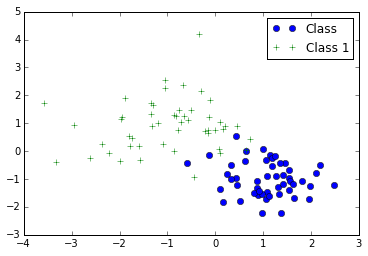

In [94]:
data = sio.loadmat('ejemplo_class_dos.mat')
X = data['X']
T = np.concatenate((np.array(mat.repmat([0],50,1)),np.array(mat.repmat([1],50,1))),axis = 0)
targets = np.ravel(T)
print T.shape,X.shape
plt.plot(X[0:50,0],X[0:50,1],'o')
plt.plot(X[50:100,0],X[50:100,1],'+')

plt.legend({'Class 1','Class'})
plt.show()

Dado que es un proceso iterativo, inicialicemos $\bf{w}$ en cero

In [95]:
Xamp = np.append(np.ones((100,1)),X,axis = 1)
XampT = Xamp.T
N,D = X.shape
w = np.zeros((D+1,1))  # se utilizara como w_nuevo
want = np.ones((len(w),1)) # se utilizara como w_viejo
umbral = 1e-12 # Se define un umbral para el cual el gradiente de w sera hara mas cercano a cero con el paso de las iteraciones
niters = 0
totiters = 50 # Maximo numero de iteraciones
deltagrad = 1
deltagradv = -1*np.ones((totiters,1)) # vector donde se almacenara el valor del gradiente en cada iteracion


Dado que es un proceso iterativo, utilizamos un ciclio para el cual se repetira la optimizacion siempre y cuando el gradiente de $\bf{w}$ no sea mayor al umbral o el numero maximo de iteraciones no se haya alcanzado

El valor final de
 w =  [[ 0.739759  ]
 [-2.91961896]
 [ 3.4724322 ]]
El error de class fue de:  5.0 %


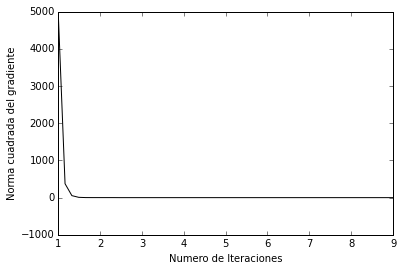

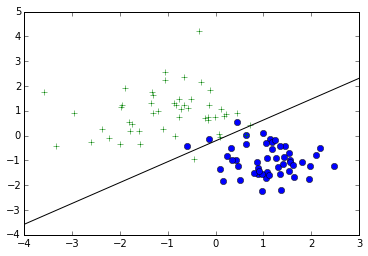

In [114]:
t = T
while ((deltagrad > umbral) or (niters > totiters)):
    a = Xamp.dot(w)
    y = 1/(1 + np.exp(-a))
    grad = XampT.dot(y - t)
    r =y*(1-y)
    R = r*np.eye(100)
    #print R.shape
    H = XampT.dot(R.dot(Xamp))
    want = w
    #print grad.shape,H.shape
    invH = np.linalg.inv(H)
    w = w - invH.dot(grad);
    deltagrad = (grad.T).dot(grad)
    deltagradv[niters] = deltagrad
    niters = niters + 1
    print "processing iteration: ",niters

print "El valor final de\n w = ",w
xiters = np.linspace(1,niters)
plt.plot(xiters, deltagradv, 'k')
plt.xlabel('Numero de Iteraciones')
plt.ylabel('Norma cuadrada del gradiente')

ak = Xamp.dot(w)
yTest = 1/(1 + np.exp(-ak))
syTest = yTest
syTest[yTest > 0.5] = 1
syTest[yTest < 0.5] = 0
error = np.sum(np.abs(syTest- t))/len(t)
error = error*100
print "El error de class fue de: ",error,"%"
idC1 = np.where(t ==0)[0]
idC2 = np.where(t ==1)[0]
plt.figure()
plt.plot(X[idC1, 0], X[idC1, 1], 'o')
plt.plot(X[idC2, 0], X[idC2, 1], '+')
x1 = np.linspace(-4, 3, 100)
x2 = -w[0]/w[2] - (w[1]/w[2])*x1
plt.plot(x1, x2, 'k')